In [1]:
import json
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Bad key "axes.color_cycle" on line 29 in
/Users/chuklin/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import lib

In [3]:
%ls testdata/FakeNewsNet/Data/BuzzFeed/RealNewsContent/BuzzFeed_Real_1-Webpage.json

testdata/FakeNewsNet/Data/BuzzFeed/RealNewsContent/BuzzFeed_Real_1-Webpage.json


In [4]:
doc2vec = lib.Doc2Vec('./model/GoogleNews-vectors-negative300-SLIM.bin')

In [15]:
NPOINTS = 10
file_pattern = 'testdata/FakeNewsNet/Data/BuzzFeed/{0:s}NewsContent/BuzzFeed_{0:s}_{1:d}-Webpage.json'

doc_contents = {}
doc_vectors = {}
for group in ['Fake', 'Real']:
    for file_index in range(NPOINTS):
        with open(file_pattern.format(group, 5 * file_index + 1)) as f:
            doc = json.load(f)
            contents = '{}\n{}\n{}'.format('', doc['text'], ', '.join(doc.get('authors', '')))
            doc_key = '{}_{}'.format(group, file_index)
            doc_contents[doc_key] = contents
            doc_vectors[doc_key] = doc2vec.get_vector(contents)

OOV words: {'’', '‘', '?', 'to', ':', 'of', ',', '“', 's**t', 'a'}
OOV words: {'and', 'a', 'of', ',', 'Rahami', 'anti-Muslim', '.'}
OOV words: {'’', 'to', '9-11', 'of', ',', '.', 'a'}
OOV words: {'’', 'and', '”', '15', 'to', '9-11', 'of', ',', '.', '“', 'a'}
OOV words: {'a', '?', 'to', ':', ',', '.'}
OOV words: {'(', 'and', '”', 'to', 'Harambe-related', 'of', ',', '.', '“', 'racism.', 'a'}
OOV words: {'to', 'Allahu', ',', '.', '9', 'a'}
OOV words: {'’', 'and', 'to', 'of', '.', ',', '8.1k', 'a'}
OOV words: {'’', 'Sansaricq', '2010', 'of', ':', ',', '.', '0', 'a'}
OOV words: {'’', 'firey', '”', '.', 'loot-filled', ',', '“', '4.3k', 'a'}
OOV words: {'and', '17', 'a', 'to', '23', ',', '8:30', '29', '.'}
OOV words: {'and', 'to', ':', 'of', "'s", ',', '.'}
OOV words: {'’', '‘', ']', 'a', 'liberal-controlled', 'to', 'America…', ':', ',', '[', '—', '.'}
OOV words: {'and', 'a', 'of', "'s", ',', '50', 'Zianna', '.'}
OOV words: {'’', 'a', 'to', ',', '.'}
OOV words: {']', 'and', 'RIOTS…', 'of', ',

In [16]:
df = pd.DataFrame(doc_vectors)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

cosines = cosine_similarity(df.values.T)
df_cosines = pd.DataFrame(cosines, columns=df.columns, index=df.columns)

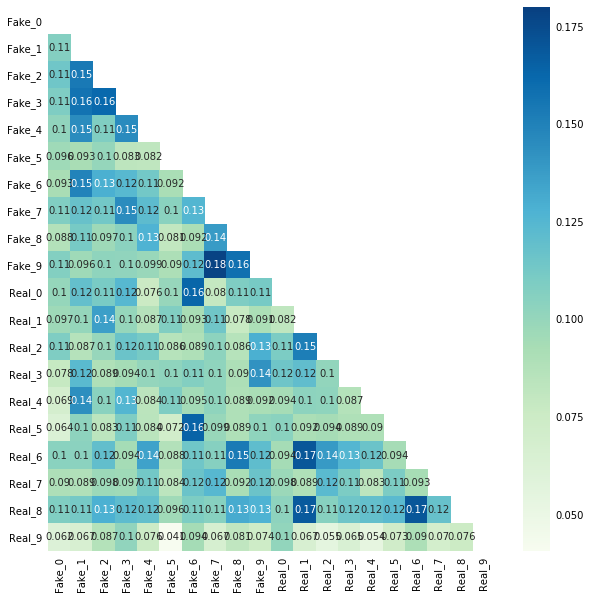

In [23]:
plt.rcParams['figure.figsize']=(10,10)

mask = np.zeros_like(df_cosines)
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(df_cosines, mask=mask, annot=True, cmap="GnBu", vmax=0.18)

In [24]:
print(doc_contents['Fake_8'])


0 SHARES Facebook Twitter

Bernard Sansaricq, former president of the Haitian Senate, issued a blistering statement condemning the Clinton Foundation, which has been posted at Donald Trump’s campaign website.

Sansaricq’s statement says:

Sadly, when an earthquake rocked the nation of Haiti in 2010, corruption moved in faster than the help so desperately needed. Today, the people of Haiti are still suffering despite the billions of dollars that have flowed into the Clinton Foundation.

The Clintons exploited this terrible disaster to steal billions of dollars from the sick and starving people of Haiti. The world trusted the Clintons to help the Haitian people during their most desperate time of need and they were deceived.

The Clintons and their friends are richer today while millions still live in tents. The world deserves to know where the money went and why help was never sent.

The situation Sansaricq refers to is discussed in detail here, and also features prominently in Peter S

In [25]:
print(doc_contents['Real_6'])


Hillary Clinton said this year's election will impact the next 50 years of America. | AP Photo Clinton: ‘The next 50 days will determine the next 50 years’

Hillary Clinton on Tuesday warned that the nearly 50-day sprint to Election Day will impact far more than just the next four or eight years.

Making an appeal to black voters during an interview on the “Steve Harvey Morning Show,” Clinton stressed that voters can’t sit this one out.

Story Continued Below

“Every issue they care about is at stake in this election,” Clinton said. “This is not: ‘Oh, you know, a little here, a little there. We can — you know, we can take it, no matter who wins.’ No. The next 50 days will determine the next 50 years, and I say that absolutely seriously.”

The former secretary of state said she hopes everyone is registered to vote and directed listeners to a website to find out whether they’re registered “because I need you.”

“We gotta stand up and be counted in this election,” she added.

Clinton’s c